In [1]:
import random
import torch
from d2l import torch as d2l

In [17]:
# 构造人造数据集
def synthetic_data(w, b, num_examples):  
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [18]:
features

tensor([[ 0.1694,  0.5322],
        [ 0.0517, -0.2439],
        [-0.4714, -1.5398],
        ...,
        [ 1.3272, -0.7594],
        [-0.8651,  0.7632],
        [-0.0670,  0.4668]])

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.2196, -0.3581]) 
label: tensor([4.9695])


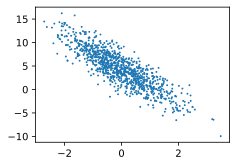

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

In [39]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3701, -0.6772],
        [-0.0457, -1.5244],
        [ 0.1607, -0.3915],
        [-1.2059,  0.9587],
        [ 0.5580, -1.1844],
        [ 0.6069,  0.6123],
        [-1.9072,  0.3419],
        [-1.2923,  1.7063],
        [-2.0352,  0.7476],
        [-0.0724,  0.3958]]) 
 tensor([[ 7.2300],
        [ 9.3008],
        [ 5.8507],
        [-1.4658],
        [ 9.3324],
        [ 3.3190],
        [-0.7727],
        [-4.1870],
        [-2.4085],
        [ 2.6974]])


In [34]:
from torch import tensor


test_list = torch.tensor([0, 1, 4, 9, 16, 25])

indices = list(range(len(test_list)))
random.shuffle(indices)
print(indices)

batch_indices = torch.tensor(indices[1:3])
print(batch_indices)

print(test_list[torch.tensor([4, 2])])

[1, 5, 0, 3, 2, 4]
tensor([5, 0])
tensor([16,  4])


In [40]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [47]:
x = torch.arange(4.0, requires_grad=True)
print(x)
print(x.grad)

tensor([0., 1., 2., 3.], requires_grad=True)
None


In [59]:
y = 2 * torch.dot(x, x)
x.grad.zero_()
y.backward()

In [66]:
y2 = x * x
print(y2)
x.grad.zero_()
y2.sum().backward()
print(x.grad)

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 2., 4., 6.])


In [53]:
print(y)

tensor(28., grad_fn=<MulBackward0>)


In [60]:
print(x.grad)

tensor([ 0.,  4.,  8., 12.])
